In [1]:
# Daten Einlesen
import pandas as pd
filename1 = 'XMOVERScore_FinalBench.csv'


data = pd.read_csv(filename1)



bert = data.iloc[0:7]
distilbert = data.iloc[7:14]
xlmr = data.iloc[14:21]
tiny = data.iloc[21:]


models_df = [bert, xlmr,distilbert, tiny ]
for mod in models_df:
    print(mod)

Tiny-VErsions
      LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
0  cs-en  0.235  15.855671  3.558393     0.442  9.398126  0.964480
1  de-en  0.395  13.523358  2.286151     0.485  9.307220  0.877646
2  fi-en  0.337  13.095006  2.195590     0.622  9.155854  0.491279
3  lv-en  0.222  14.211346  3.180200     0.591  7.273632  0.303442
4  ru-en  0.342  15.529096  2.705046     0.491  9.320954  0.264931
5  tr-en  0.341  14.867953  3.258908     0.474  9.124849  0.227061
6  zh-en  0.369  16.058394  2.547295     0.456  9.213624  0.818694
       LP  Score       Time    Memory  LM_Score   LM_Time  LM_Usage
14  cs-en  0.522  13.434774  3.119256     0.550  9.357930  0.781249
15  de-en  0.589  13.019631  2.614598     0.586  9.367455  0.711064
16  fi-en  0.697  11.060187  2.085313     0.716  9.247418  0.332877
17  lv-en  0.610  11.423567  2.570462     0.689  7.224518  0.248850
18  ru-en  0.640  13.486646  2.560999     0.650  9.348438  0.264931
19  tr-en  0.637  11.945083  2.574326     

In [3]:
# Aufbereitung
dist = distilbert.copy()
xlm= xlmr.copy()
tiny = tiny.copy()
xlm_var = []
dist_var = []
tiny_var = []


for col in range(1,xlm.shape[1]):
    #xlm_var.append(xlm[col].mean(axis = 0))

    for row in range(xlm.shape[0]):
        xlm.iloc[row, col] =  abs(xlm.iloc[row, col].copy() / bert.iloc[row, col].copy())
        dist.iloc[row, col] = abs(dist.iloc[row, col].copy() / bert.iloc[row, col].copy())
        tiny.iloc[row, col] =  abs(tiny.iloc[row, col].copy() / bert.iloc[row, col].copy())
models=[dist,xlm,tiny]


# Calculate the variance of scores


[]


In [5]:
import plotly.graph_objects as go
import plotly.io as pio

In [8]:
modelle = models_df
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='Score'
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= modelle[0][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='mBERT'
))

fig.add_trace(go.Scatterpolar(
      r=  modelle[1][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-RoBERTa'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[2][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[3][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
    #colorway = ['deepskyblue','orange', 'mediumaquamarine', 'tomato'],
  showlegend=True,
        #title = "Model Score"
)
pio.write_image(fig,'images/ModelScore.png' , format='png')
fig.show()


In [9]:
import plotly.graph_objects as go
lang = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
columm ='LM_Score'
modelle = models_df
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r= modelle[0][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='mBERT'
))
fig.add_trace(go.Scatterpolar(
      r=  modelle[1][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='XLM-RoBERTa'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[2][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='DistilBERT'
))
fig.add_trace(go.Scatterpolar(
      r= modelle[3][columm].to_numpy(),
      theta=lang,
      fill='toself',
      name='TinyBERT'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,
    #title = "Model + LM(GP2) for remapping score"
)
pio.write_image(fig,'images/ModelLMScore.png' , format='png')
fig.show()

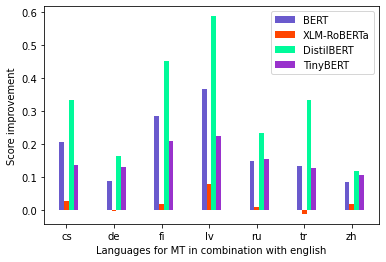

In [10]:
import matplotlib.pyplot as plt
import numpy as np
 # ###    Show increasement for LM
modelle_diff=[]
langs = ['cs', 'de', 'fi' , 'lv', 'ru', 'tr', 'zh']
performance_models = ['BERT','XLM-RoBERTa','DistilBERT', 'TinyBERT']


for i in range(4):
    scor = modelle[i]['Score'].to_numpy()
    scor_lm = modelle[i]['LM_Score'].to_numpy()

    diff = scor_lm - scor
    modelle_diff.append(diff)


bar_width = 0.1
x = langs
#negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = modelle_diff[0]

'''
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, positive_data, width=1, color='b')
'''
hatches = [ "*","x", "o", "O" ]

x = np.arange(7)

x1 = [a + bar_width for a in x]
x2 = [a + bar_width for a in x1]
x3 = [a + bar_width for a in x2]
xs = [x, x1, x2, x3]

for i in range(4):
    colo = 'slateblue'
    if i==1: colo = 'orangered'
    if i==2: colo = 'mediumspringgreen'
    if i==3: colo = 'darkorchid'
    plt.bar(xs[i], modelle_diff[i], width= bar_width, label= performance_models[i], color = colo )

plt.xticks([r + bar_width for r in range(len(langs))], langs)
plt.ylabel('Score improvement')
plt.xlabel('Languages for MT in combination with english')
plt.legend()
plt.savefig('images/XMover_MT-improvement.png')

plt.show()

In [11]:
# Aufbereitung für größerer Daten Übersicht
# Nehme gemittlelte Daten und Mittel sie über die Sprachen nochmal
XLMR_avg = []
DiBert_avg = []
Tiny_avg = []
avg_avg_mod = [ DiBert_avg, XLMR_avg, Tiny_avg]

modelle_avg = models.copy()

for j in range(len(modelle_avg)):
    for col in range(1,modelle_avg[j].shape[1]):
        temp=0
        for row in range(modelle_avg[j].shape[0]):
            temp += modelle_avg[j].iloc[row,col]
        temp = temp/7
        avg_avg_mod[j].append(temp)
print(avg_avg_mod)

[[0.4669914510232293, 0.7821441077002221, 0.9939002438110375, 0.9111381264957114, 0.9976529804911394, 0.8742278865131842], [1.9616010994515627, 0.8447166123857348, 0.921774798405902, 1.2339607993674575, 1.0058174950486758, 0.8740081077665566], [0.7608763514411818, 0.89274310324058, 0.9969791580481014, 0.7763360363305353, 1.002253364756637, 0.8739662411350235]]


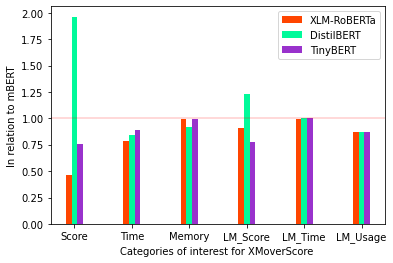

In [14]:
# Plotte Parallele Daten

modelle_diff=[]
avg_avg_mod_descr = ["Score","Time","Memory","LM_Score","LM_Time","LM_Usage"]
performance_models = ['XLM-RoBERTa','DistilBERT', 'TinyBERT']

bar_width = 0.1
x = avg_avg_mod_descr



var = [ 0.5 , 0.5, 0.5, 0.5 , 0.5, 0.5  ]

x = np.arange(len(x))

x1 = [a + bar_width for a in x]
x2 = [a + bar_width for a in x1]
x3 = [a + bar_width for a in x2]
xs = [x, x1, x2]

for i in range(3):

    if i==0: colo = 'orangered'
    if i==1: colo = 'mediumspringgreen'
    if i==2: colo = 'darkorchid'
    plt.bar(xs[i], avg_avg_mod[i], width= bar_width, label= performance_models[i] , color=colo  , capsize=3)

plt.axhline(1, c='r', lw=0.3)

plt.xticks([r + bar_width for r in range(len(avg_avg_mod_descr))], avg_avg_mod_descr)
plt.ylabel('In relation to mBERT')
plt.xlabel('Categories of interest for XMoverScore ')
plt.legend()
plt.savefig('images/XMover_Alldata.png')

plt.show()

